# UMR QB1 - Seminar zur Genexpressionsanalyse

---

## Medizinisches Problem & Forschungsfrage

**"_Was sind die molekularen Unterschiede zwischen Krebszellen und normalem menschlichem Gewebe, und wie können wir diese Unterschiede nutzen, um neue therapeutische Ziele und deren Medikamente für die Krebsbehandlung zu identifizieren?_"**

### **Warum dies für die Medizin wichtig ist:**
- **Krebs-Heterogenität:** Verschiedene Krebsarten haben unterschiedliche molekulare Signaturen
- **Personalisierte Medizin:** Behandlungen müssen auf spezifische Krebsarten zugeschnitten sein
- **Medikamentenresistenz:** Krebszellen entwickeln sich weiter, um der Behandlung zu entgehen
- **Therapeutische Ziele:** Neue Medikamente werden dringend für bessere Patientenergebnisse benötigt

### **Was wir entdecken werden:**
1. **Molekulare Krebs-Signaturen:** Gene, die in Krebs vs. normalem Gewebe konsistent verändert sind
2. **Therapeutische Schwachstellen:** Signalwege, die mit Medikamenten gezielt behandelt werden könnten
3. **Drug Repurposing-Möglichkeiten:** Bestehende Medikamente, die Krebs behandeln könnten
4. **Biomarker-Identifikation:** Gene, die das Therapieansprechen vorhersagen könnten

---


## Datensatz: Eine echte Krebs vs. Normal Gewebe Studie

**Klinischer Kontext:** Universal Human Reference (UHR) vs Human Brain Reference (HBR)  
**Medizinische Relevanz:** Krebs-Zelllinien vs. normales menschliches Hirngewebe<br>
**Stichprobengröße:** 6 Proben (3 Krebs-Replikate vs. 3 Normal-Hirngewebe-Replikate)  
**Datentyp:** Paired-end RNA-Sequenzierung (Chromosom 22 Teilmenge)  
**Referenz:** Griffith M, Walker JR, Spies NC, Ainscough BJ, Griffith OL (2015) Informatics for RNA Sequencing: A Web Resource for Analysis on the Cloud. *PLoS Comput Biol* 11(8): e1004393. https://doi.org/10.1371/journal.pcbi.1004393



### **Medizinische Proben**

#### **UHR (Universal Human Reference) = KREBS-PROBEN**
- **Zusammensetzung:** Gesamt-RNA aus 10 verschiedenen menschlichen Krebs-Zelllinien
- **Enthaltene Krebsarten:** Brust-, Leber-, Gebärmutterhals-, Hoden-, Hirn-, Hautkrebs plus Immunzellen (T-Zelle, B-Zelle, Makrophage, Histiozyt)
- **Warum dies wichtig ist:** Repräsentiert die gemeinsamen molekularen Merkmale verschiedener Krebsarten
- **Klinische Relevanz:** Hilft bei der Identifizierung von pan-Krebs therapeutischen Zielen

#### **HBR (Human Brain Reference) = NORMALE GEWEBE-KONTROLLEN**
- **Zusammensetzung:** Gesamt-RNA aus Gehirnen von 23 gesunden Kaukasiern, meist 60-80 Jahre alt
- **Warum Hirngewebe:** Bietet eine normale Gewebe-Baseline zum Vergleich
- **Klinische Relevanz:** Zeigt, wie "gesunde" Genexpression aussieht

### **Die biologische Hypothese:**
**Krebszellen werden systematische Veränderungen in der Genexpression im Vergleich zu normalem Gewebe zeigen, die offenbaren:**
1. **Onkogene** (krebsfördernde Gene), die überexprimiert sind
2. **Tumorsuppressoren** (krebsverhindernde Gene), die unterdrückt sind
3. **Stoffwechselwege**, die verändert sind, um Krebswachstum zu unterstützen
4. **Medikamenten-Ziele**, die Krebszellen selektiv abtöten könnten

---

## Lernziele


**Technische Fähigkeiten:**
1. Durchführung einer differentiellen Expressionsanalyse zur Identifikation von Krebs-Biomarkern
2. Durchführung einer Pathway-Anreicherung zum Verständnis der Krebsbiologie
3. Anwendung von computationalem Drug Repurposing zur therapeutischen Entdeckung

**Medizinisches Verständnis:**
1. **Interpretation von Krebs-Gensignaturen** im klinischen Kontext
2. **Identifikation potenzieller Biomarker** für Krebsdiagnose/-prognose
3. **Verständnis des Drug Repurposing** als Strategie für schnellere therapeutische Entwicklung
4. **Verknüpfung computationaler Befunde** mit realen Krebsbehandlungsentscheidungen

**Klinische Translation:**
1. **Bewertung therapeutischer Ziele**, die durch RNA-Seq identifiziert wurden
2. **Beurteilung von Medikamentenkandidaten** für Krebsbehandlungspotenzial
3. **Verständnis von Personalisierter Medizin**-Ansätzen in der Krebsversorgung

---

## Setup und Einführung

#### Installation von Conda

Nach Ausführung dieser Zelle wird die Laufzeitumgebung automatisch neu gestartet. Warten Sie, bis dieser Vorgang abgeschlossen ist, bevor Sie fortfahren. Ignorieren Sie Fehlermeldungen und Warnungen

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


#### Überprüfung der Conda-Installation

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


#### Installation aller erforderlichen Software und Pakete

(ca. 5 min)

In [2]:
%%bash
conda install -c bioconda -c conda-forge bioconductor-deseq2 r-optparse r-ggplot2 r-gprofiler2 r-dplyr r-tidyr -y -q 2>&1

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconductor-deseq2
    - r-dplyr
    - r-ggplot2
    - r-gprofiler2
    - r-optparse
    - r-tidyr


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    argcomplete-3.6.3          |     pyhd8ed1ab_0          41 KB  conda-forge
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    bioconductor-biobase-2.66.0|    r44h3df3fcb_0         2.6 MB  bioconda
    bioconductor-biocgenerics-0.52.0|    r44hdfd78af_3         678 KB  bioconda
    bioconductor-biocparallel-1.40.0|    r44he5774e6_1         1.6 MB  bioconda
    bioconductor-data-packages-20250625|       hdfd78af_0         250 KB  bioconda
    bioconductor-d

#### Daten- und Skript-Repository

- Expressionsdaten: Vorverarbeitete RNA-Seq Datendateien und Count-Matrix
- Analyseskripte für jeden Schritt
- Referenzgenom-Dateien und Annotationen

In [3]:
%%bash
git clone https://gitlab.uni-rostock.de/wb283/qb1rnaseq.git

Cloning into 'qb1rnaseq'...


In [4]:
%%bash
ls

condacolab_install.log
qb1rnaseq
sample_data


In [5]:
%%bash
ls qb1rnaseq

counts.tsv
drug_repositioning.py
expression_technology_comparison_ed2.jpg
griffith-data.tar.gz
load_data.R
mapping.sh
pathway_analysis.R
README.md
rnaseq_experiments.png
rnaseq_expression_table_ed2.jpg
rnaseq_mapping_example_ed2.jpg
run_deseq2.R
samples.tsv
V57


In [6]:
%cd qb1rnaseq

/content/qb1rnaseq


In [7]:
%%bash
ls

counts.tsv
drug_repositioning.py
expression_technology_comparison_ed2.jpg
griffith-data.tar.gz
load_data.R
mapping.sh
pathway_analysis.R
README.md
rnaseq_experiments.png
rnaseq_expression_table_ed2.jpg
rnaseq_mapping_example_ed2.jpg
run_deseq2.R
samples.tsv
V57


---

## 1 Datenexploration

### Laden der Genexpressionsdaten

Dieser Schritt lädt die vorverarbeiteten RNA-Seq Expressionsdaten und bereitet sie für die statistische Analyse vor.

**Was geschieht hier:**
- Einlesen der Count-Matrix (Zeilen = Gene, Spalten = Proben)
- Laden der Proben-Metadaten (Krebs vs. Normal)
- Grundlegende Qualitätskontrollprüfungen
- Vorbereitung der Daten für DESeq2-Analyse

**Medizinische Bedeutung:**
Diese Count-Matrix repräsentiert, wie aktiv jedes Gen in Krebs vs. normalem Gewebe ist. Höhere Werte = höhere Genexpression.

In [8]:
%%bash
head samples.tsv

sample	condition	tissue_type	clinical_context
UHR_rep1	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep1
UHR_rep2	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep2
UHR_rep3	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep3
HBR_rep1	normal	brain_tissue	Human Brain Reference Rep1
HBR_rep2	normal	brain_tissue	Human Brain Reference Rep2
HBR_rep3	normal	brain_tissue	Human Brain Reference Rep3

In [9]:
%%bash
head counts.tsv

	UHR_rep1	UHR_rep2	UHR_rep3	HBR_rep1	HBR_rep2	HBR_rep3
ENST00000615943.1	0	0	0	0	0	0
ENST00000618365.1	0	0	0	0	0	0
ENST00000623473.1	0	0	0	0	0	0
ENST00000624155.1	0	0	0	0	0	0
ENST00000422332.1	0	1	0	0	0	0
ENST00000612732.1	0	0	0	0	0	0
ENST00000614148.1	0	0	0	0	0	0
ENST00000614087.1	0	0	0	0	0	0
ENST00000621672.1	0	0	0	0	0	0


---

## 2 Differentielle Expressionsanalyse

### Differentielle Expressionsanalyse mit DESeq2

**Was ist differentielle Expression?**
Differentielle Expressionsanalyse identifiziert Gene, die zwischen Krebs und normalem Gewebe unterschiedlich exprimiert sind. Dies offenbart:
- **Onkogene**: Gene mit höherer Expression in Krebs (fördern Krebswachstum)
- **Tumorsuppressoren**: Gene mit niedrigerer Expression in Krebs (verhindern normalerweise Krebs)

**Wie funktioniert DESeq2?**
DESeq2 ist eine statistische Methode, die:
1. Normalisiert Count-Daten über Proben hinweg
2. Modelliert biologische Variabilität zwischen Replikaten
3. Testet auf signifikante Expressionsunterschiede
4. Korrigiert für multiple Testprobleme

**Wichtige Ausgabemetriken:**
- **Log2FoldChange**: Wie stark sich die Expression verändert hat (positiv = höher in Krebs)
- **Adjusted p-value (padj)**: Statistische Signifikanz (< 0.05 = signifikant)
- **Base mean**: Durchschnittliche Expressionsstärke über alle Proben

**Medizinische Interpretation:**
- Gene mit **hohem positivem log2FC** sind potenzielle Medikamenten-Ziele (zu unterdrücken)
- Gene mit **hohem negativem log2FC** sind potenzielle Biomarker für Krebssuppression
- **Signifikante Gene** (padj < 0.05) könnten als diagnostische oder prognostische Marker dienen

In [10]:
%%bash
Rscript run_deseq2.R --metadata samples.tsv --expression counts.tsv

Reading input files...
Retained 1567 genes for analysis
Running DESeq2 analysis...
GTF file not found, using transcript IDs as gene symbols
Differentially expressed genes written to: degs.tsv 
Generating plots...
null device 
          1 
Checking genes for heatmap...
Genes in res_df: 1466 
Genes in vsd: 1567 
Overlapping genes: 0 
No overlap found, using top genes from vsd directly...
Selected 20 genes for heatmap
Heatmap saved to: heatmap.png 
null device 
          1 
Analysis complete. Plots saved as: pca_plot.png, heatmap.png, volcano_plot.png 
R workspace saved as: deseq2_results.RData 


Warning messages:
1: package ‘DESeq2’ was built under R version 4.4.3 
2: package ‘matrixStats’ was built under R version 4.4.3 
3: package ‘optparse’ was built under R version 4.4.3 
using ntop=500 top features by variance


In [11]:
%%bash
head degs.tsv

transcript_id	gene_symbol	log2FoldChange	padj
ENST00000328933.9	ENST00000328933	-5.44971233343666	1.2984070065879e-197
ENST00000396425.7	ENST00000396425	-4.34445020035159	1.38613580557907e-191
ENST00000407418.7	ENST00000407418	-1.91107694294968	3.33868563830195e-131
ENST00000333039.2	ENST00000333039	-3.26400647488188	3.03095273074958e-105
ENST00000255882.10	ENST00000255882	-2.32237418235649	1.98205874397843e-96
ENST00000262795.5	ENST00000262795	-4.07804763987837	3.84219085794151e-96
ENST00000329492.5	ENST00000329492	-5.7667403903729	3.26023605271452e-79
ENST00000341184.6	ENST00000341184	-4.05960810246796	1.3791377151873e-75
ENST00000216133.9	ENST00000216133	-4.22126557190662	1.9292461247474e-74


### Interpretation der DESeq2-Ergebnisse

**Verständnis der Ausgabetabelle:**

Jede Zeile repräsentiert ein Gen mit den folgenden Spalten:

**gene_id**
- Eindeutige Kennung für jedes Gen oder Transkript
- Format: [ENSEMBL](https://www.ensembl.org/Homo_sapiens/Info/Index) -Transkript-ID (z.B. ENST00000...)

**baseMean**
- Durchschnittliche normalisierte Count-Anzahl über alle Proben
- Höhere Werte = stärkere Gesamt-Genexpression
- Wichtig für die Priorisierung biologisch relevanter Gene

**log2FoldChange**
- Expressionsänderung zwischen Krebs und normalem Gewebe (auf log2-Skala)
- **Positive Werte**: Gene höher exprimiert in Krebs (potenzielle Onkogene)
- **Negative Werte**: Gene niedriger exprimiert in Krebs (potenzielle Tumorsuppressoren)
- **Magnitude**: |log2FC| > 1 bedeutet eine mindestens 2-fache Veränderung

**lfcSE (log fold change standard error)**
- Unsicherheitsmaß für die log2FoldChange-Schätzung
- Kleinere Werte = präzisere Schätzungen

**stat**
- Wald-Teststatistik (verwendet für die Hypothesentestung)
- Größere absolute Werte deuten auf stärkere Evidenz für differentielle Expression hin

**pvalue**
- Roher p-Wert aus dem statistischen Test
- Wahrscheinlichkeit, diesen Effekt zufällig zu beobachten

**padj (adjusted p-value)**
- P-Wert korrigiert für multiples Testen (Benjamini-Hochberg-Methode)
- **< 0.05**: Statistisch signifikante differentielle Expression
- **< 0.01**: Hochsignifikante differentielle Expression
- Dies ist die wichtigste Metrik für die Identifikation echter Krebs-assoziierter Gene

---

### Priorisierung von Krebs-assoziierten Genen

**Für therapeutische Ziele (Onkogene):**
```
Suchen nach:
- padj < 0.05 (statistisch signifikant)
- log2FoldChange > 1 (mindestens 2-fach erhöht in Krebs)
- baseMean > 50 (angemessen exprimiert)
```

**Für Krebs-Biomarker (Tumorsuppressoren):**
```
Suchen nach:
- padj < 0.05 (statistisch signifikant)
- log2FoldChange < -1 (mindestens 2-fach verringert in Krebs)
- baseMean > 50 (angemessen exprimiert)
```

**Klinische Bedeutung:**
- **Hochregulierte Gene** (positiver log2FC) könnten mit Inhibitor-Medikamenten gezielt behandelt werden
- **Herunterregulierte Gene** (negativer log2FC) könnten Wege offenbaren, die wiederhergestellt werden müssen
- **Signifikante Gene** sind Kandidaten für diagnostische Tests oder therapeutische Interventionen

### Visualisierung differentiell exprimierter Gene

**Volcano Plot:**
Visualisiert sowohl die Größe der Veränderung (log2 fold change) als auch die statistische Signifikanz (p-Wert) für alle Gene gleichzeitig.

**Interpretation:**
- **X-Achse**: Expressionsveränderung (negativ = herunterreguliert in Krebs, positiv = hochreguliert)
- **Y-Achse**: Statistische Signifikanz (-log10 p-Wert; höher = signifikanter)
- **Rote Punkte**: Potenzielle Onkogene (hochreguliert in Krebs)
- **Blaue Punkte**: Potenzielle Tumorsuppressoren (herunterreguliert in Krebs)
- **Graue Punkte**: Nicht signifikante Veränderungen

**Klinische Bedeutung:**
- Die am weitesten rechts liegenden roten Punkte sind die stärksten Onkogen-Kandidaten
- Die am weitesten links liegenden blauen Punkte sind die stärksten Tumorsuppressor-Kandidaten
- Höhe auf der Y-Achse bestätigt statistische Robustheit

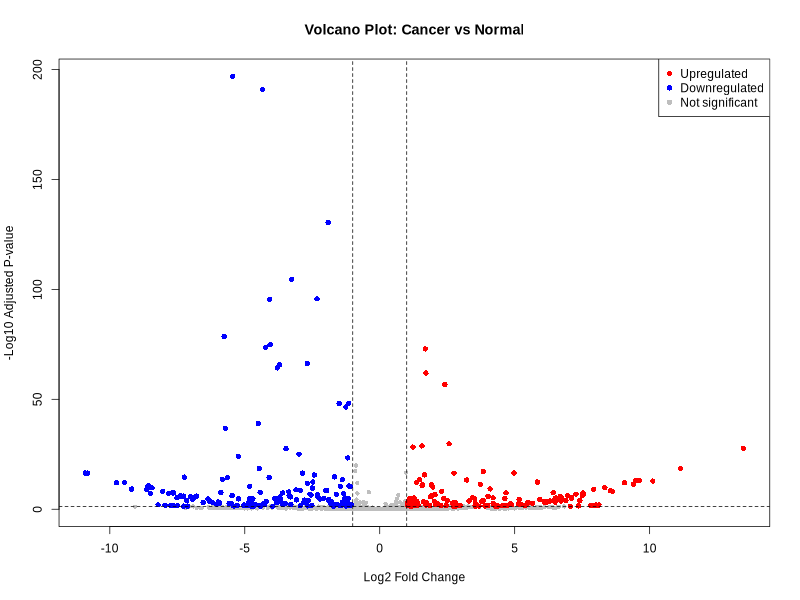

In [15]:
from IPython.display import Image, display
display(Image('volcano_plot.png'))

**PCA Plot (Principal Component Analysis):**
Reduziert Tausende von Genmessungen auf zwei Dimensionen und zeigt, wie ähnlich oder unterschiedlich Proben basierend auf ihren gesamten Genexpressionsprofilen sind.

**Interpretation:**
- **Jeder Punkt** = eine Probe (rot = Krebs, blau = normal)
- **Abstand zwischen Punkten** = molekulare Ähnlichkeit
- **Klare Trennung** = deutliche molekulare Unterschiede zwischen Krebs und Normal
- **PC1 & PC2** = Hauptkomponenten, die die größte Variation erfassen

**Klinische Bedeutung:**
- Klare Trennung bestätigt robuste Krebs vs. Normal-Unterschiede
- Clustering innerhalb von Gruppen zeigt konsistente Replikation
- Dies validiert, dass unsere Genexpressionsunterschiede real sind

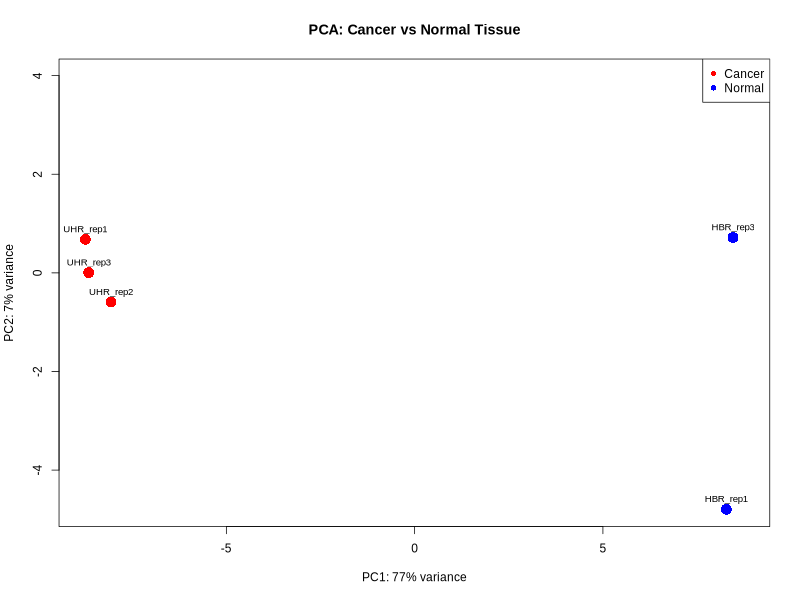

In [16]:
display(Image('pca_plot.png'))

**Heatmap (Wärmekarte):**
Zeigt Expressionsmuster der 20 signifikantesten Gene über alle Proben hinweg, wobei Farbe die Expressionsstärke repräsentiert.

**Interpretation:**
- **Zeilen** = Gene (Top 20 signifikanteste)
- **Spalten** = Proben (Krebs links, Normal rechts)
- **Farbe** = Expressionsstärke (rot = hoch, blau = niedrig)
- **Muster** = Konsistente Unterschiede zwischen Krebs und Normal

**Klinische Bedeutung:**
- Gene mit roter/Krebs- und blau/Normal-Spalten = potenzielle Onkogene
- Gene mit blau/Krebs- und roter/Normal-Spalten = potenzielle Tumorsuppressoren
- Konsistente Muster über Replikate hinweg bestätigen zuverlässige Biomarker

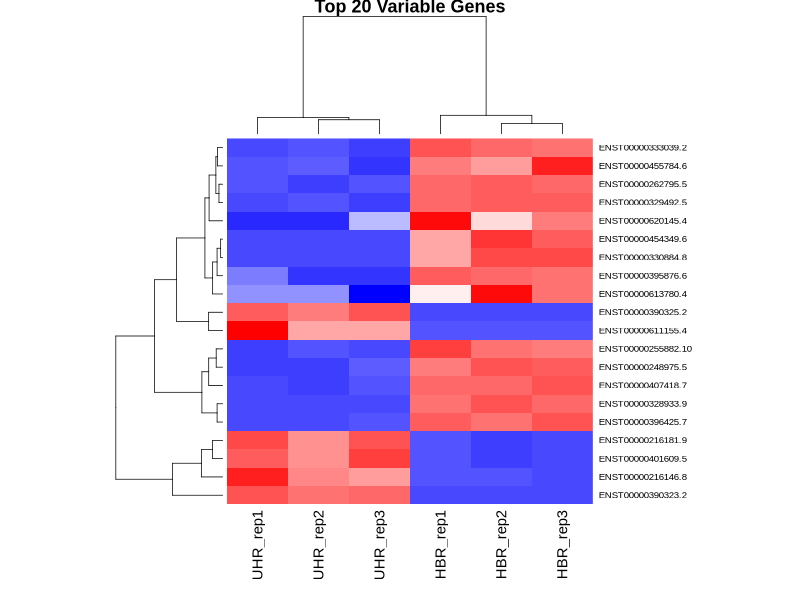

In [17]:
display(Image('heatmap.png'))

---

## 3 Pathway-Analyse

### Pathway-Analyse mit g:Profiler

**Was ist Pathway-Analyse?**
Pathway-Analyse gruppiert differentiell exprimierte Gene in biologische Funktionen, Stoffwechsel- und Signalwege. Statt einzelner Gene untersuchen wir ganze zelluläre Prozesse.

**Warum dies wichtig ist:**
- Einzelne Gene sind schwer zu interpretieren
- Pathway-Veränderungen offenbaren, **wie** Krebs funktioniert
- Identifiziert Prozesse, die gezielt mit Medikamenten behandelt werden können
- Verbindet molekulare Daten mit bekannter Krebsbiologie

**Was g:Profiler macht:**
1. Nimmt unsere Liste differentiell exprimierter Gene entgegen
2. Testet auf Überrepräsentation in biologischen Datenbanken:
   - **GO:BP** (Gene Ontology: Biological Process) - zelluläre Funktionen
   - **KEGG** - metabolische und Signalwege
   - **REAC** (Reactome) - molekulare Interaktionsnetzwerke
3. Gibt angereicherte Pathways mit statistischer Signifikanz zurück

**Erwartete Krebs-Pathways:**

**Hochreguliert in Krebs (Onkogene):**
- Zellzyklus-Progression (unkontrollierte Zellteilung)
- DNA-Replikation (schnelle Zellvermehrung)
- Metabolische Umprogrammierung (Energieerzeugung für Wachstum)
- Angiogenese (Blutgefäßbildung zur Tumorversorgung)

**Herunterreguliert in Krebs (Tumorsuppressoren):**
- Apoptose (programmierter Zelltod)
- DNA-Reparatur (Aufrechterhaltung der genomischen Stabilität)
- Zellzyklus-Checkpoints (Stopp geschädigter Zellen)
- Immunüberwachung (Erkennung abnormaler Zellen)

**Klinische Anwendung:**
- Angereicherte Pathways offenbaren **therapeutische Schwachstellen**
- Beispiel: Wenn DNA-Reparatur herunterreguliert ist → DNA-schädigende Chemotherapie könnte effektiver sein
- Pathway-Wissen leitet die Auswahl von Kombinationstherapien

In [18]:
%%bash
Rscript pathway_analysis.R --input degs.tsv --output pathway_results.tsv

Reading differential expression results...
Found 305 significant genes for pathway analysis
Upregulated genes: 147 
Downregulated genes: 158 
Running pathway enrichment for upregulated genes...
Running pathway enrichment for downregulated genes...
Pathway enrichment results written to: pathway_results.tsv 
Total significant pathways found: 98 

Top 10 enriched pathways:
                                      term_name     p_value     direction
84 modulation of chemical synaptic transmission 0.001771398 downregulated
85       regulation of trans-synaptic signaling 0.001771398 downregulated
86               chemical synaptic transmission 0.002007729 downregulated
87         anterograde trans-synaptic signaling 0.002007729 downregulated
88                     trans-synaptic signaling 0.002007729 downregulated
89                           synaptic signaling 0.002431160 downregulated
90                          cell-cell signaling 0.003203056 downregulated
91                                 

Warning messages:
1: package ‘gprofiler2’ was built under R version 4.4.3 
2: package ‘optparse’ was built under R version 4.4.3 


In [19]:
%%bash
head pathway_results.tsv

query	source	term_id	term_name	term_size	query_size	intersection_size	p_value	direction
query_1	GO:BP	GO:0050804	modulation of chemical synaptic transmission	513	89	12	0.00177139796598693	downregulated
query_1	GO:BP	GO:0099177	regulation of trans-synaptic signaling	514	89	12	0.00177139796598693	downregulated
query_1	GO:BP	GO:0007268	chemical synaptic transmission	775	89	14	0.00200772896918267	downregulated
query_1	GO:BP	GO:0098916	anterograde trans-synaptic signaling	775	89	14	0.00200772896918267	downregulated
query_1	GO:BP	GO:0099537	trans-synaptic signaling	781	89	14	0.00200772896918267	downregulated
query_1	GO:BP	GO:0099536	synaptic signaling	807	89	14	0.00243116000089305	downregulated
query_1	GO:BP	GO:0007267	cell-cell signaling	1342	89	18	0.00320305626477095	downregulated
query_1	GO:BP	GO:0006810	transport	4407	89	36	0.00580842803509294	downregulated
query_1	GO:BP	GO:0050808	synapse organization	563	89	11	0.00580842803509294	downregulated


---

## 4 Drug Repurposing

### Drug Repurposing in der Krebsforschung

**Was ist Drug Repurposing?**
Drug Repurposing (auch Wirkstoffumnutzung genannt) bedeutet, neue therapeutische Anwendungen für bestehende Medikamente zu finden. Dieser Ansatz bietet mehrere Vorteile:

1. **Schnellere Entwicklung**: 5-10 Jahre vs. 15-20 Jahre für neue Medikamente
2. **Bekannte Sicherheitsprofile**: Bestehende Medikamente haben etablierte Sicherheitsdaten
3. **Niedrigere Kosten**: Reduziert das Risiko und die Kosten der Medikamentenentwicklung
4. **Sofortige klinische Anwendung**: Kann in einigen Fällen off-label verschrieben werden

**Wie funktioniert computationales Drug Repurposing?**
Unser Ansatz verwendet Genexpressions-Signaturen:
1. **Krebs-Signatur**: Listen von Onkogenen (hochreguliert) und Tumorsuppressoren (herunterreguliert)
2. **Medikamenten-Effekt-Datenbank**: Wie Tausende von Medikamenten die Genexpression beeinflussen
3. **Signatur-Matching**: Finde Medikamente, die Krebs-Genexpressionsmuster umkehren

**Erfolgsgeschichten:**
- **Metformin**: Diabetes-Medikament → Krebsprävention (200+ klinische Studien)
- **Aspirin**: Schmerzlinderung → Krebsprävention (FDA-zugelassen)
- **Rapamycin**: Immunsuppressivum → Krebs- und Alterungsforschung

**Unsere Skript-Vorbereitung:**
Konvertiert unsere DESeq2-Ergebnisse in ein Format, das mit L1000CDS2, einer großen Drug Repurposing-Datenbank, kompatibel ist.

### Abfrage der L1000CDS2-Medikamenten-Datenbank

**Was ist L1000CDS2?**
L1000CDS2 (L1000 Characteristic Direction Signature) ist ein von dem Ma'ayan-Labor entwickeltes computationales Tool, das:

1. **Datenbankumfang**: Enthält Genexpressions-Signaturen für >20.000 Medikamente, die an menschlichen Zelllinien getestet wurden
2. **Signatur-Matching**: Verwendet mathematische Algorithmen, um Medikamente zu finden, die Krankheits-Signaturen umkehren
3. **LINCS-Programm**: Teil der NIH Library of Integrated Network-based Cellular Signatures Initiative

**Wie funktioniert der Algorithmus?**
1. **Eingabe-Signatur**: Unsere Krebs-Gen-Signatur (Onkogene + Tumorsuppressoren)
2. **Datenbanksuche**: Vergleicht mit medikamenten-induzierten Expressionsveränderungen
3. **Bewertungssystem**: Berechnet, wie gut jedes Medikament die Krebs-Signatur umkehrt
4. **Ranking**: Gibt Medikamente nach ihrem Potenzial, Krebs entgegenzuwirken, sortiert zurück

**Interpretation der Ergebnisse:**
- **Negative Scores**: Medikamente, die Krebs-Signaturen umkehren (hohes therapeutisches Potenzial)
- **Positive Scores**: Medikamente, die Krebs-Signaturen nachahmen (diese vermeiden)
- **Score-Magnitude**: Größere absolute Werte deuten auf stärkere Effekte hin

**Klinische Validierung:**
Das System hat erfolgreich identifiziert:
- Bekannte Krebs-Medikamente (validiert den Ansatz)
- Repositionierte Medikamente, die bereits in Krebs-Studien sind
- Neue Repurposing-Möglichkeiten für weitere Untersuchungen


In [22]:
%%bash
python drug_repositioning.py --input degs.tsv --output drug_candidates.txt

Read 1466 genes from degs.tsv
Found 305 significant genes
Using 147 upregulated and 150 downregulated genes
Querying L1000CDS2 database...
No drug candidates returned from L1000CDS2
No drug candidates found


In [23]:
%%bash
cat drug_candidates.txt

pert_desc	pert_id	cell_id	pert_dose	pert_dose_unit	pert_time	pert_time_unit	score


### Interpretation der Drug Repurposing-Ergebnisse

**Verständnis der L1000CDS2-Scores:**

Die Drug Repurposing-Analyse produziert eine geordnete Liste von Verbindungen basierend auf ihrer Fähigkeit, Krebs-Gen-Signaturen umzukehren. So interpretieren Sie die Ergebnisse:

**Score-Interpretation:**
- **Negative Scores**: Hohes therapeutisches Potenzial (Medikamente, die Krebs-Signaturen umkehren)
- **Positive Scores**: Diese Medikamente vermeiden (sie ahmen Krebs-Signaturen nach oder verschlechtern sie)
- **Score-Magnitude**: Größere absolute Werte deuten auf stärkere vorhergesagte Effekte hin

**Validierungskategorien:**

**Bekannte Krebs-Medikamente (Positive Kontrollen):**
- **Beispiele**: Doxorubicin, Paclitaxel, Cisplatin, Tamoxifen, Imatinib
- **Bedeutung**: Validiert unseren computationalen Ansatz
- **Klinische Bedeutung**: Bestätigt, dass die Krebs-Signatur biologisch relevant ist
- **Forschungswert**: Zeigt, dass die Methode etablierte Krebs-Therapeutika identifizieren kann

**Erfolgreich repositionierte Medikamente:**
- **Metformin**: Ursprünglich für Diabetes → Jetzt in 200+ Krebs-Klinischen Studien
- **Aspirin**: Ursprünglich für Schmerz/Entzündung → FDA-zugelassen für Krebsprävention
- **Klinischer Erfolg**: Diese Medikamente beweisen, dass Repurposing in der Praxis funktioniert
- **Patientennutzen**: Bereits für off-label Anwendung in einigen Fällen verfügbar

**Vielversprechende Repurposing-Kandidaten:**
- **Statine** (Cholesterin-Medikamente): Anti-Krebs-Eigenschaften in Studien entdeckt
- **Rapamycin** (Immunsuppressivum): Aktive Krebs- und Alterungsforschung
- **Chloroquin** (Antimalariamittel): Wird für Krebs-Anwendungen untersucht
- **Forschungsmöglichkeit**: Neue Anwendungen, die weitere Validierung benötigen

---

### Warum Drug Repurposing funktioniert

**Wissenschaftliche Vorteile:**
- **Schnellerer Entwicklungszeitplan**: 5-10 Jahre vs. 15-20 Jahre für neue Medikamente
- **Bekannte Sicherheitsprofile**: Bestehende Medikamente haben etablierte Sicherheits- und Nebenwirkungsdaten
- **Niedrigere Entwicklungskosten**: Reduziert das finanzielle Risiko für pharmazeutische Unternehmen
- **Regulatorische Vorteile**: Schnellerer Zulassungsprozess für neue Indikationen

**Biologische Begründung:**
- **Pathway-Targeting**: Viele Krankheiten teilen gemeinsame molekulare Signalwege
- **Polypharmakologie**: Einzelne Medikamente beeinflussen oft mehrere biologische Ziele
- **Netzwerk-Effekte**: Medikamente können miteinander verbundene zelluläre Systeme beeinflussen
- **Serendipitöse Entdeckungen**: Unerwartete vorteilhafte Effekte bei verschiedenen Krankheiten




---

## Kontakt

Dr. rer. nat. Israel Barrantes<br>
Research Group Translational Bioinformatics (head)<br>
Institute for Biostatistics and Informatics in Medicine and Ageing Research, Office 3017<br>
Rostock University Medical Center<br>
Ernst-Heydemann-Str. 8<br>
18057 Rostock, Germany<br>

Email: israel.barrantes[bei]uni-rostock.de<br>

---
Update: 29.10.2025
